**TASK** - **2**

**Social** **Media** **Sentiment** **Analysis** **Project**

**Import** **Necessary** **Libaries**

In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import plotly.express as px


**Load** **and** **Explore** **the** **Dataset**

In [2]:
df = pd.read_csv('/content/sentimentdataset.csv')
df

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,728,732,Collaborating on a science project that receiv...,Happy,2017-08-18 18:20:00,ScienceProjectSuccessHighSchool,Facebook,#ScienceFairWinner #HighSchoolScience,20.0,39.0,UK,2017,8,18,18
728,729,733,Attending a surprise birthday party organized ...,Happy,2018-06-22 14:15:00,BirthdayPartyJoyHighSchool,Instagram,#SurpriseCelebration #HighSchoolFriendship,25.0,48.0,USA,2018,6,22,14
729,730,734,Successfully fundraising for a school charity ...,Happy,2019-04-05 17:30:00,CharityFundraisingTriumphHighSchool,Twitter,#CommunityGiving #HighSchoolPhilanthropy,22.0,42.0,Canada,2019,4,5,17
730,731,735,"Participating in a multicultural festival, cel...",Happy,2020-02-29 20:45:00,MulticulturalFestivalJoyHighSchool,Facebook,#CulturalCelebration #HighSchoolUnity,21.0,43.0,UK,2020,2,29,20


In [4]:
# Display the first few rows
print(df.head(5))

   Unnamed: 0.1  Unnamed: 0  \
0             0           0   
1             1           1   
2             2           2   
3             3           3   
4             4           4   

                                                Text    Sentiment  \
0   Enjoying a beautiful day at the park!        ...   Positive     
1   Traffic was terrible this morning.           ...   Negative     
2   Just finished an amazing workout! 💪          ...   Positive     
3   Excited about the upcoming weekend getaway!  ...   Positive     
4   Trying out a new recipe for dinner tonight.  ...   Neutral      

             Timestamp            User     Platform  \
0  2023-01-15 12:30:00   User123          Twitter     
1  2023-01-15 08:45:00   CommuterX        Twitter     
2  2023-01-15 15:45:00   FitnessFan      Instagram    
3  2023-01-15 18:20:00   AdventureX       Facebook    
4  2023-01-15 19:55:00   ChefCook        Instagram    

                                     Hashtags  Retweets  Likes     

In [5]:
# Check for missing values
print(df.isnull().sum())

Unnamed: 0.1    0
Unnamed: 0      0
Text            0
Sentiment       0
Timestamp       0
User            0
Platform        0
Hashtags        0
Retweets        0
Likes           0
Country         0
Year            0
Month           0
Day             0
Hour            0
dtype: int64


In [19]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Text', 'Sentiment', 'User', 'Platform',
       'Hashtags', 'Retweets', 'Likes', 'Country', 'Year', 'Month', 'Day',
       'Hour', 'clean_text'],
      dtype='object')

In [20]:
for column in df.columns:
    num_distinct_values = len(df[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")


Unnamed: 0.1: 732 distinct values
Unnamed: 0: 732 distinct values
Text: 707 distinct values
Sentiment: 3 distinct values
User: 685 distinct values
Platform: 4 distinct values
Hashtags: 697 distinct values
Retweets: 26 distinct values
Likes: 38 distinct values
Country: 115 distinct values
Year: 14 distinct values
Month: 12 distinct values
Day: 31 distinct values
Hour: 22 distinct values
clean_text: 706 distinct values


In [21]:
df['Country'].value_counts()

,count
Country,
USA,59
USA,55
UK,49
Canada,44
Australia,41
...,...
Netherlands,1
USA,1
Germany,1


In [22]:
df['Platform'].value_counts()

,count
Platform,
Instagram,258
Facebook,231
Twitter,128
Twitter,115


**Preprocess** **the** **Text** **Data**

In [6]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [10]:
import nltk
nltk.download('punkt_tab')

import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)  # Remove mentions
    text = re.sub(r'#\w+', '', text)  # Remove hashtags
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    tokens = word_tokenize(text)  # Tokenization
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatization
    return ' '.join(tokens)

df['clean_text'] = df['Text'].apply(preprocess_text)


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


**Sentiment** **Classification**

In [11]:
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

def get_sentiment(text):
    score = sia.polarity_scores(text)['compound']
    if score > 0.05:
        return 'Positive'
    elif score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment'] = df['clean_text'].apply(get_sentiment)


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


**Visualizing** **Sentiments**

1. Sentiment Distribution

In [24]:
sentiment_counts = df['Sentiment'].value_counts()
sentiment_counts

,count
Sentiment,
Positive,459
Negative,189
Neutral,84


<ipython-input-12-b5a3f47ff4c6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Sentiment'], palette='coolwarm')


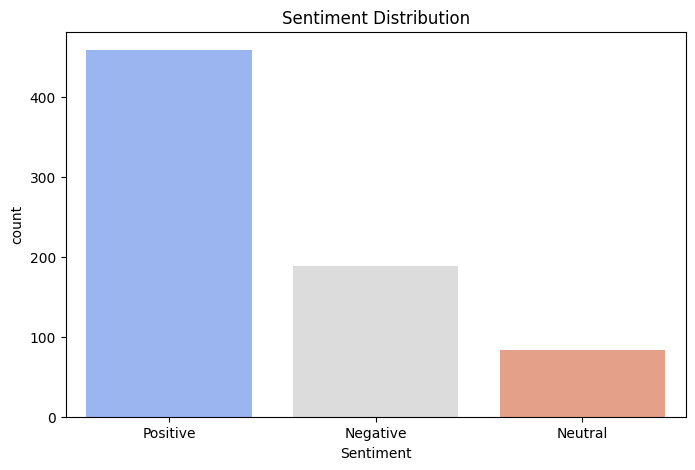

In [12]:
plt.figure(figsize=(8,5))
sns.countplot(x=df['Sentiment'], palette='coolwarm')
plt.title("Sentiment Distribution")
plt.show()


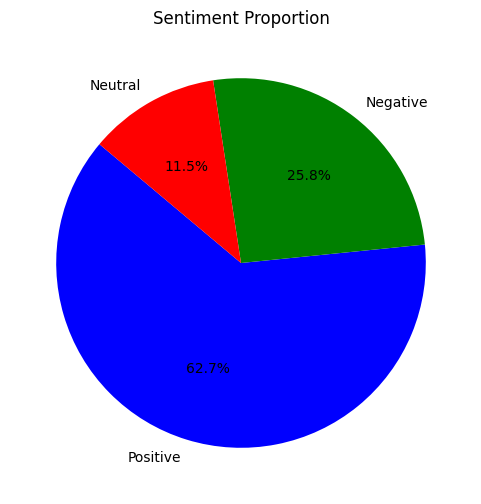

In [43]:
# Pie Chart for Sentiment Proportion
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=["blue", "green", "red"], startangle=140)
plt.title("Sentiment Proportion")
plt.show()

In [44]:
import pandas as pd

# Example DataFrame (replace with your actual data)
data = {
    'Text': ['I love this!', 'This is bad.', 'It is okay.', 'Absolutely fantastic!', 'Not good at all.'],
    'Sentiment': ['positive', 'negative', 'neutral', 'Positive', 'Negative']
}
df= pd.DataFrame(data)

# Ensure consistency in the Sentiment column
df['Sentiment'] = df['Sentiment'].str.lower()

# Filter data based on Sentiment
Positive_sent = df[df['Sentiment'] == 'positive']
Negative_sent = df[df['Sentiment'] == 'negative']
Neutral_sent = df[df['Sentiment'] == 'neutral']

# Validation
print("Positive Sentiment:")
print(Positive_sent)

print("\nNegative Sentiment:")
print(Negative_sent)

print("\nNeutral Sentiment:")
print(Neutral_sent)

Positive Sentiment:
                    Text Sentiment
0           I love this!  positive
3  Absolutely fantastic!  positive

Negative Sentiment:
               Text Sentiment
1      This is bad.  negative
4  Not good at all.  negative

Neutral Sentiment:
          Text Sentiment
2  It is okay.   neutral


**Platform** **Sentiment** **Visualization**

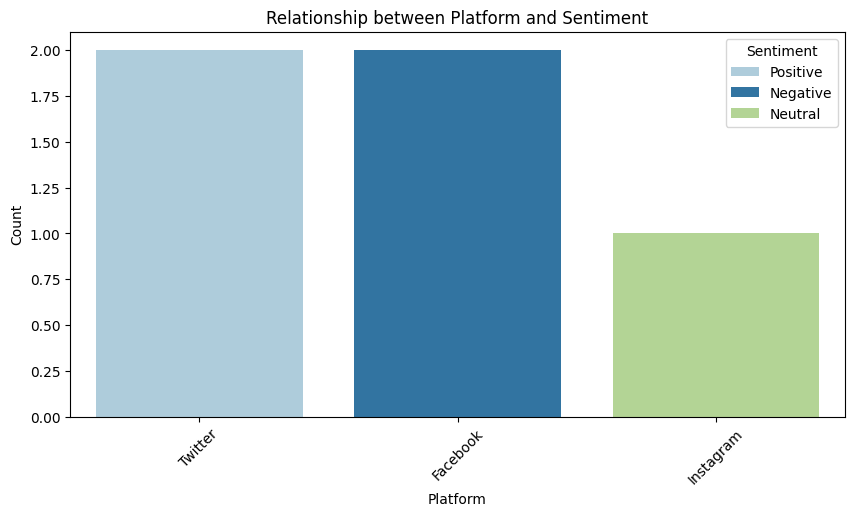

In [26]:
data = {
    'Platform': ['Twitter', 'Facebook', 'Instagram', 'Twitter', 'Facebook'],
    'Sentiment': ['Positive', 'Negative', 'Neutral', 'Positive', 'Negative']
}
df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(10, 5))
sns.countplot(
    x='Platform',
    hue='Sentiment',
    data=df,
    palette='Paired',
    order=df['Platform'].unique()
)
plt.title('Relationship between Platform and Sentiment')
plt.xlabel('Platform')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


**Country** **Sentiment** **Visualization**

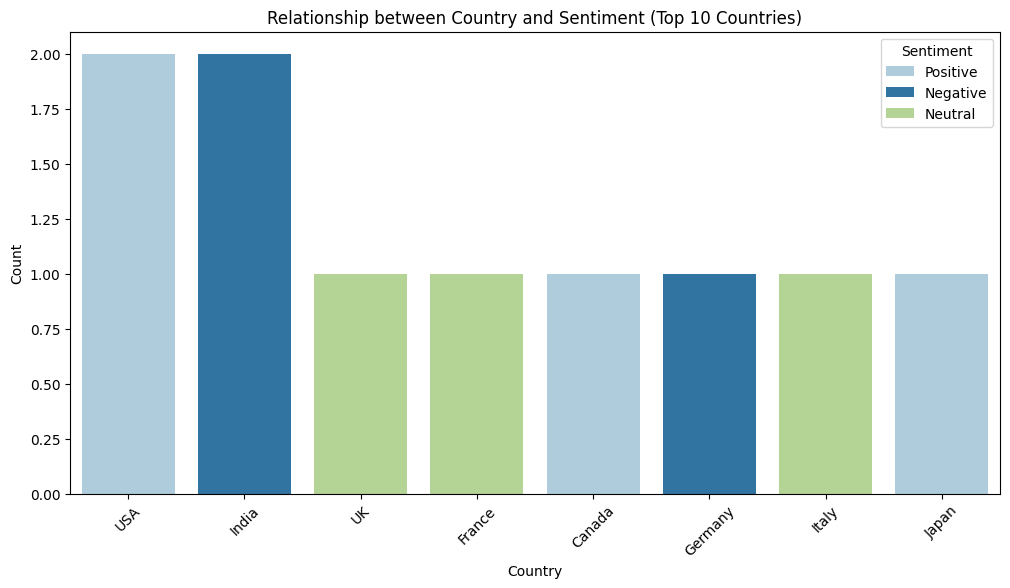

In [35]:

data = {
    'Country': ['USA', 'India', 'UK', 'USA', 'India', 'France', 'Canada', 'Germany', 'Italy', 'Japan'],
    'Sentiment': ['Positive', 'Negative', 'Neutral', 'Positive', 'Negative', 'Neutral', 'Positive', 'Negative', 'Neutral', 'Positive']
}
df = pd.DataFrame(data)

# Extract the top 10 countries
top_10_countries = df['Country'].value_counts().head(10).index

# Filter data for only the top 10 countries
df_top_10_countries = df[df['Country'].isin(top_10_countries)]

# Plotting
plt.figure(figsize=(12, 6))
sns.countplot(
    x='Country',
    hue='Sentiment',
    data=df_top_10_countries,
    palette='Paired',
    order=top_10_countries  # Ensure correct order
)
plt.title('Relationship between Country and Sentiment (Top 10 Countries)')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

2. Word Cloud for Most Frequent Words

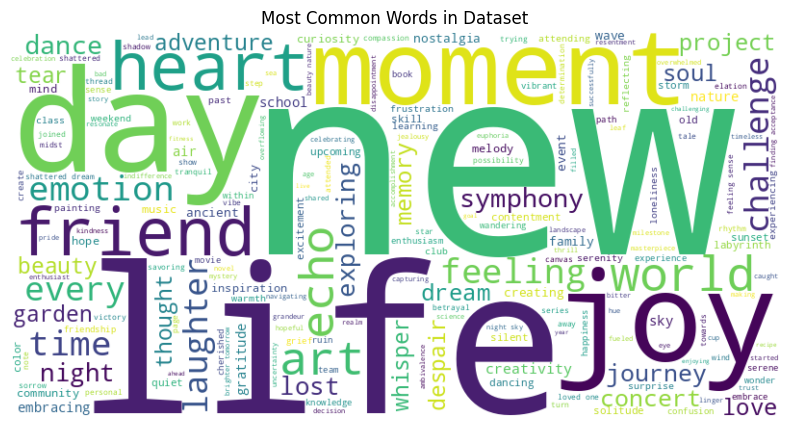

In [13]:
all_words = ' '.join(df['clean_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in Dataset")
plt.show()


3. Sentiment Trends Over Time

<ipython-input-14-95f94f9f3c86>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_resampled = df.resample('M').count()


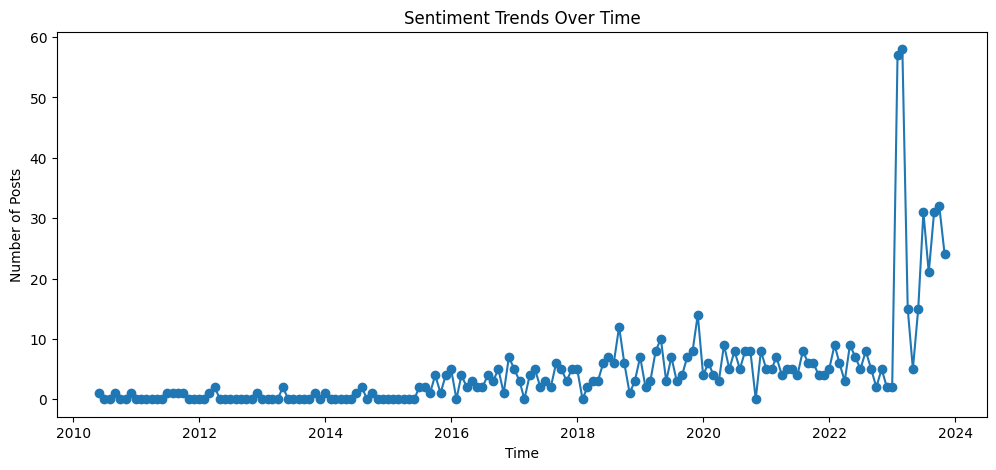

In [14]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp', inplace=True)
df_resampled = df.resample('M').count()

plt.figure(figsize=(12,5))
plt.plot(df_resampled.index, df_resampled['Sentiment'], marker='o')
plt.title("Sentiment Trends Over Time")
plt.xlabel("Time")
plt.ylabel("Number of Posts")
plt.show()


**Train** **Machine** **Learning** **Model**

1. Convert Text to Numeric Features

In [15]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['clean_text'])
y = df['Sentiment']

# Encode sentiment labels
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


2. Split Data into Training and Testing Sets

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


3. Train Naïve Bayes Classifier

In [17]:
model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB()

4. Evaluate Model Performance

Model Accuracy: 77.55%
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.85      0.80        40
           1       0.35      0.43      0.39        14
           2       0.87      0.80      0.83        93

    accuracy                           0.78       147
   macro avg       0.66      0.69      0.67       147
weighted avg       0.79      0.78      0.78       147



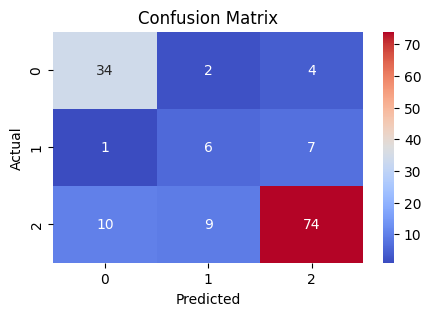

In [18]:
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(5,3))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='coolwarm')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
